사용한 데이터는 500명의 서로다른 성별과 키, 몸무게입니다.  
이를 이용하여 건강 등급과 BMI를 나누고 그에 따른 분포도를 시각화합니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 데이터 불러오기

In [2]:
df=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


데이터에 나와있는 'Index'는 건강 등급입니다.  
좀더 알아보기 쉽게하기 위해 **Index->Health**로 이름을 바꾸어줍니다.  
1등급부터 5등급까지 있습니다

In [3]:
df.columns=['Gender','Height','Weight','Health']
df.head()

,Gender,Height,Weight,Health
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


# 2. 데이터 전처리, isna 확인 및 메모리 축소

Null 값이 없는것을 확인합니다.

In [4]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Health    0
dtype: int64

메모리를 정리해보겠습니다. 현재 15.8+KB 임을 알 수 있습니다.

In [5]:
df.memory_usage(deep=True)

Index       128
Gender    31010
Height     4000
Weight     4000
Health     4000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Health  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
df['Gender']=df['Gender'].astype('category')
df['Height']=df['Height'].astype(np.uint8)
df['Weight']=df['Weight'].astype(np.uint8)
df['Health']=df['Health'].astype(np.uint8)

In [8]:
df.memory_usage(deep=True)

Index     128
Gender    704
Height    500
Weight    500
Health    500
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  500 non-null    category
 1   Height  500 non-null    uint8   
 2   Weight  500 non-null    uint8   
 3   Health  500 non-null    uint8   
dtypes: category(1), uint8(3)
memory usage: 2.2 KB


메모리가 13%로 감소하였습니다.

In [10]:
print(2200/15800)

0.13924050632911392


각각의 등급을 알아보기 쉽게 바꾸어주었습니다.

In [11]:
X_col=df[["Height","Weight","Health"]]

In [12]:
corr=df.corr()
corr

,Height,Weight,Health
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Health,-0.422223,0.804569,1.000000


# 3. 데이터 시각화 및 의미 도출

<ipython-input-14-8d7023c3ae24>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_col.hist(ax=ax, bins=50)


array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Health'}>, <AxesSubplot:>]],
      dtype=object)

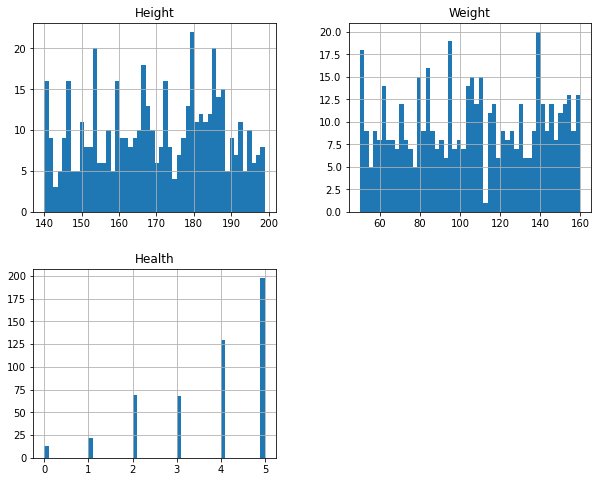

In [14]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10, 8))
X_col.hist(ax=ax, bins=50)

In [15]:
Grade=df.iloc[:,3].values

### 아래는 체중과 키에따른 건강 등급 Scatter Grid 입니다.

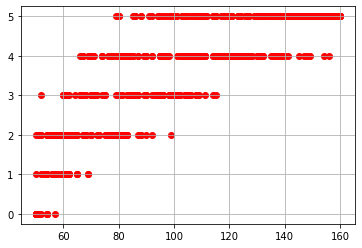

In [16]:
plt.scatter(X_col.Weight,Grade,color="r")
plt.grid()

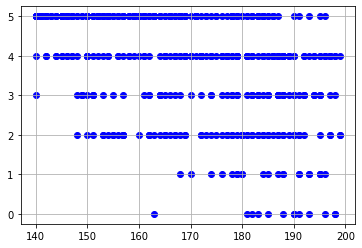

In [17]:
plt.scatter(X_col.Height,Grade,color="b")
plt.grid()

In [18]:
def healthy(x):
    if(x==0):
        return "Extremely Weak"
    elif(x==1):
        return "Weak"
    elif(x==2):
        return "Normal"
    elif(x==3):
        return "OverWeight"
    elif(x==4):
        return "Obesity"
    else:
        return "Extreme Obesity"
    
    
df["Health"]=df['Health'].apply(healthy)

### 건강등급을 보기쉽게 1~5등급을 영문으로 표기합니다.

In [19]:
df.head()

,Gender,Height,Weight,Health
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight


### 건강 등급과 몸무게, 키 각각의 상관관계를 나타내줍니다.

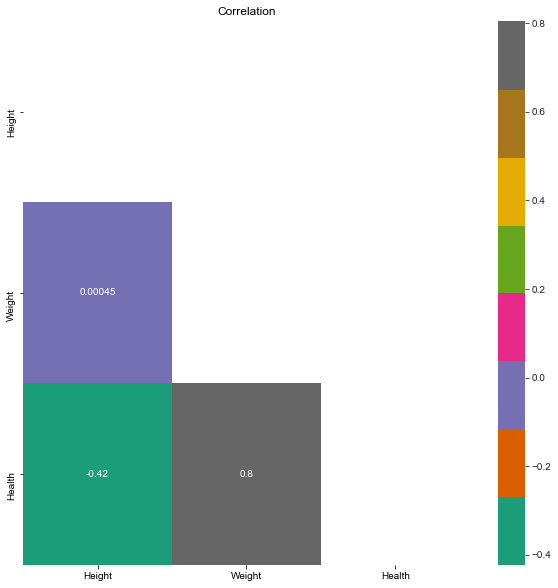

In [20]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(corr,mask=mask,cmap="Dark2",annot=True)
    plt.title("Correlation")
    plt.show()

### 키와 몸무게에 따른 건강등급을 시각화 해 보여줍니다.

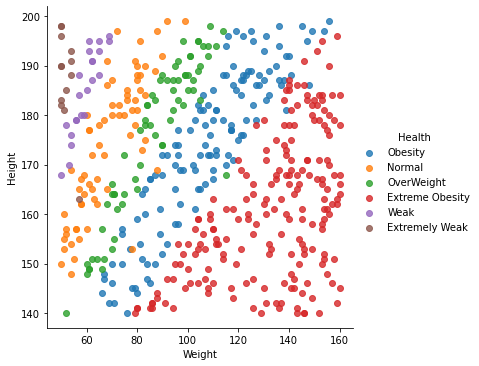

In [21]:
sns.lmplot(data=df,x="Weight",y="Height",fit_reg=False,hue="Health")

In [22]:
import matplotlib.font_manager as fm


font_path = r'C:\Windows\Fonts\batang.ttc'
fontprop = fm.FontProperties(fname=font_path, size=18)

### 건강 등급에 따른 성별 분포도를 나타냅니다.

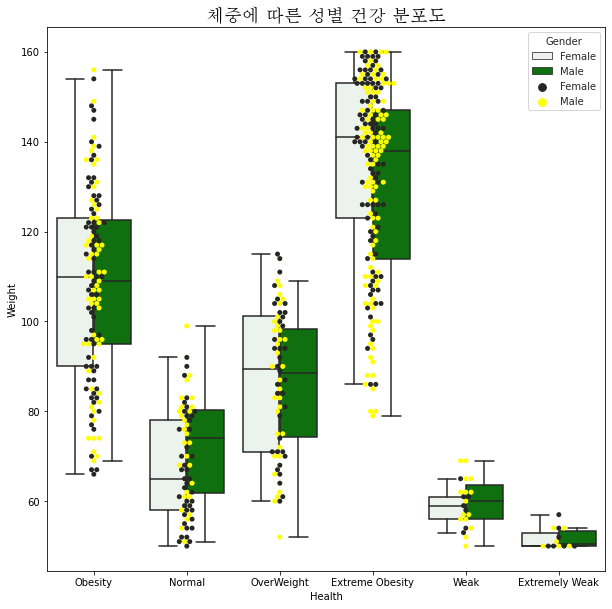

In [23]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Weight',hue='Gender',color="Green")
    sns.swarmplot(data=df,x='Health',y='Weight',hue='Gender',color="Yellow")
    plt.title("체중에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

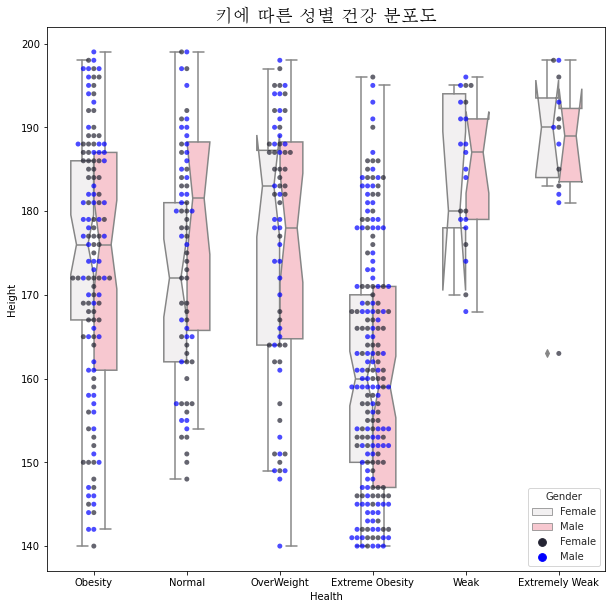

In [24]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Height',hue='Gender',color="Pink",notch=True,width=.5)
    sns.swarmplot(data=df,x='Health',y='Height',hue='Gender',color="Blue",alpha=.7)
    plt.title("키에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

### BMI 지수도 함께 비교해보겠습니다. BMI 공식을 계산해 새로운 열을 넣습니다.

In [25]:
df["BMI"]=df['Weight']/(df['Height']/100)**2

In [26]:
df.head()

,Gender,Height,Weight,Health,BMI
0,Male,174,96,Obesity,31.708284
1,Male,189,87,Normal,24.355421
2,Female,185,110,Obesity,32.140248
3,Female,195,104,OverWeight,27.350427
4,Male,149,61,OverWeight,27.476240


국제기준으로 정상체중 BMI는 18.5 ~ 24.9   
과체중BMI는 25 ~ 29.9 정도입니다.  
아무리 키가 커도 일정치 몸무게이상부터는 BMI지수가 굉장히 과체중임을 알 수 있습니다.

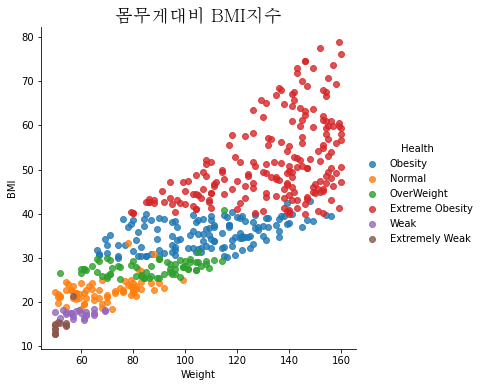

In [27]:
sns.lmplot(data=df,x="Weight",y="BMI",fit_reg=False,hue="Health") 
plt.title("몸무게대비 BMI지수",fontproperties=fontprop)
plt.show()

### 남녀별 건강등급대비 BMI분포 그래프입니다. 

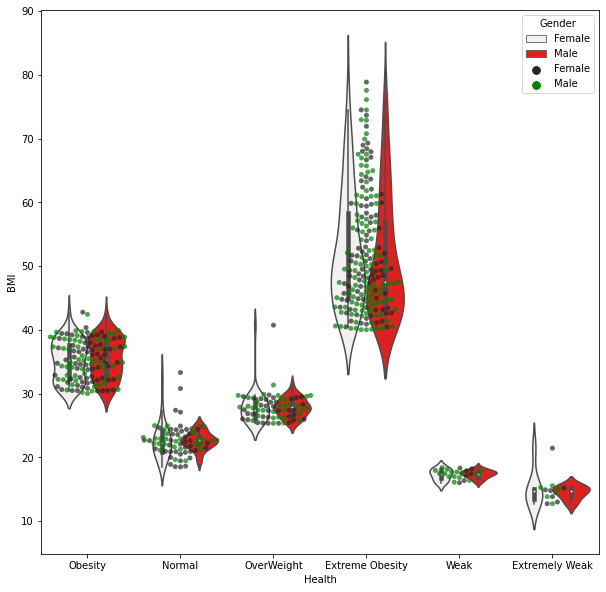

In [28]:
fig=plt.subplots(figsize=(10,10))
sns.violinplot(data=df,y="BMI",x="Health",hue="Gender",color="Red")
sns.swarmplot(data=df,x='Health',y='BMI',hue='Gender',color="Green",alpha=.7) #투명도
plt.show()

### 키, 몸무게 커널밀도 추정 그래프를 보겠습니다.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

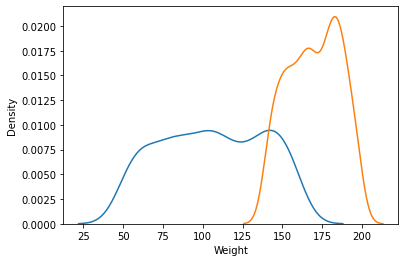

In [29]:
sns.kdeplot(df.Weight)
sns.kdeplot(df.Height)

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BMI지수 분포도'}, xlabel='BMI', ylabel='Density'>

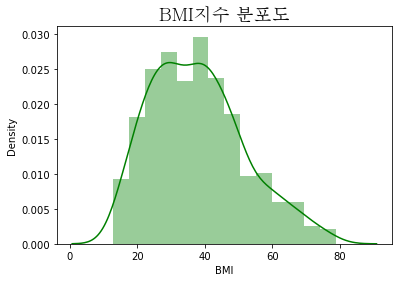

In [30]:
plt.title("BMI지수 분포도",fontproperties=fontprop)
sns.distplot(df.BMI,color="Green")

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'몸무게 분포도'}, xlabel='Weight', ylabel='Density'>

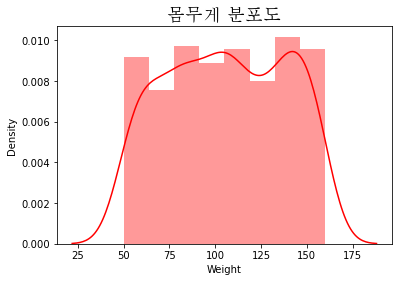

In [31]:
plt.title("몸무게 분포도",fontproperties=fontprop)
sns.distplot(df.Weight,color="Red")

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'키 분포도'}, xlabel='Height', ylabel='Density'>

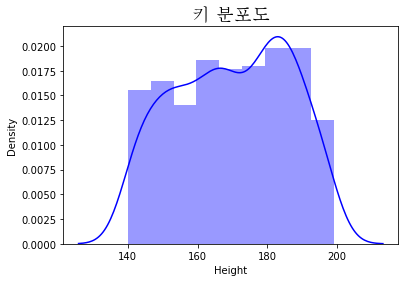

In [32]:
plt.title("키 분포도",fontproperties=fontprop)
sns.distplot(df.Height,color="Blue")

### 500명의 건강 등급에 따른 분포 그래프입니다.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Obesity'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'OverWeight'),
  Text(3, 0, 'Extreme Obesity'),
  Text(4, 0, 'Weak'),
  Text(5, 0, 'Extremely Weak')])

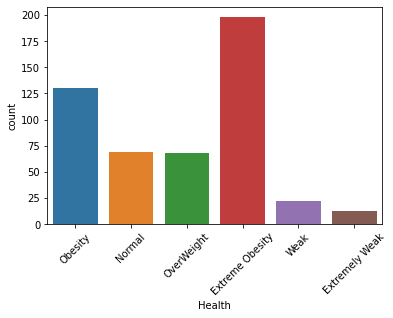

In [33]:
sns.countplot(x="Health",data=df)
plt.xticks(rotation=45)

# Density Plot

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Density Plot'}, xlabel='Height', ylabel='Weight'>

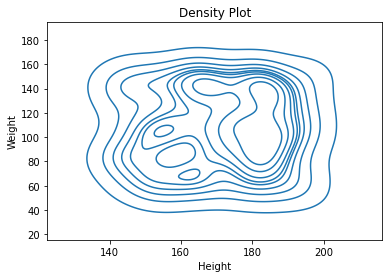

In [34]:
plt.title("Density Plot")
sns.kdeplot(df.Height,df.Weight)

# Joint Plot

Text(0.5, 1.0, 'Joint Plot')

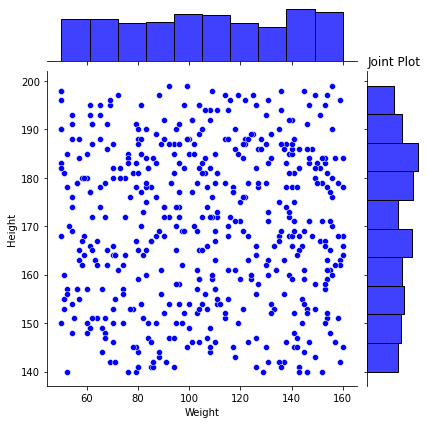

In [35]:
sns.jointplot(x='Weight',y='Height',data=df,color="Blue")
plt.title("Joint Plot")

### 최대한 Seaborn을 활용하여 다양하게 시각화 해 보았습니다. 
### 1.최종보고서까지 필요한것들 보강하기(연구할것 고민).
### 2.굳이 없어도 되는 건 덜어내어 가독성을 높이기.
### 3.수업시간에 배운내용들(배울내용들) 프로젝트에 추가적으로 녹이기
### 그리고 최종 결론 도출까지 목표입니다.

# 감사합니다.